In [93]:
# libs
import pandas as pd
import numpy as np
from datetime import datetime
import os

# bar plots
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
# today's date string for file namine automation
today_date_str = datetime.now().strftime("_%Y-%m-%d.csv")
print(today_date_str)

_2024-02-23.csv


In [124]:
# cocncat base file name with today's date string
filename = f"trading_view_raw_data/tv_screen_gap-up{today_date_str}"

# read in trading view raw data
trading_view_raw_df = pd.read_csv(filename)

print(f'{len(trading_view_raw_df.index)} U.S. Stocks \n$(pre-market change) > $0.00 USD')
trading_view_raw_df.head(5)

1168 U.S. Stocks 
$(pre-market change) > $0.00 USD


,Symbol,Description,Exchange,Market capitalization,Market capitalization - Currency,Price,Price - Currency,Pre-market Change,Pre-market Change - Currency,Pre-market Change %,...,Relative Volume 1 week,Volatility 1 day,Volatility 1 week,Volatility 1 month,Volume Weighted Average Price 1 day,Price to earnings ratio,Sector,Beta 1 year,Beta 3 years,Beta 5 years
0,MSFT,Microsoft Corporation,NASDAQ,3049005077458.27,USD,410.34,USD,4.0400,USD,0.981416,...,0.73104368,1.684720,1.407963,1.572144,411.723333,37.11233912,Technology Services,0.98372686,1.0329885,0.8991026
1,AAPL,Apple Inc.,NASDAQ,2818452019809.7324,USD,182.52,USD,0.6300,USD,0.341704,...,0.72922452,1.542007,1.373282,1.651346,183.263333,28.39894196,Electronic Technology,1.0909481,1.2225922,1.3124571
2,NVDA,NVIDIA Corporation,NASDAQ,1946779912103.8457,USD,788.17,USD,22.4300,USD,2.855942,...,1.46836546,6.218899,5.576206,3.700871,795.936667,66.03024337,Electronic Technology,1.5339884,2.2734668,1.6840769
3,META,"Meta Platforms, Inc.",NASDAQ,1233988645845.5662,USD,484.03,USD,2.0000,USD,0.411413,...,0.76258177,2.490255,2.259796,2.576637,486.912700,32.49330371,Technology Services,1.3388069,1.0570395,1.1544267
4,BRK.B,Berkshire Hathaway Inc. New,NYSE,905291407816.9218,USD,417.22,USD,2.4906,USD,0.599913,...,0.86245592,1.296456,1.044239,1.237290,418.100000,11.86622412,Finance,0.66524845,0.86781585,0.8809025


In [ ]:
# # first 10 rows df
# trading_view_raw_df_testing = trading_view_raw_df.head(10)
# # save to csv
# trading_view_raw_df_testing.to_csv('trading_view_raw_data/tv_screen_gap-up_testing.csv', index=False)
# # make sure data is there at least
# print(len(trading_view_raw_df_testing.index))

# # print test df
# trading_view_raw_df_testing

In [82]:
# # baseline raw cols from trading view initial filter
# features_raw_all = trading_view_raw_df.columns
# # convert to list
# features_raw_all = features_raw_all.tolist()
# # look at the trading view columns
# print(features_raw_all)

['Symbol', 'Description', 'Exchange', 'Market capitalization', 'Market capitalization - Currency', 'Price', 'Price - Currency', 'Pre-market Change', 'Pre-market Change - Currency', 'Pre-market Change %', 'Pre-market Gap %', 'Float shares outstanding', 'Volume 1 day', 'Relative Volume 1 day', 'Average Volume 10 days', 'Pre-market Volume', 'Relative Volume at Time', 'Relative Volume at Time.1', 'Volume 1 week', 'Relative Volume 1 week', 'Volatility 1 day', 'Volatility 1 week', 'Volatility 1 month', 'Volume Weighted Average Price 1 day', 'Price to earnings ratio', 'Sector', 'Beta 1 year', 'Beta 3 years', 'Beta 5 years']


In [ ]:
"""
define function -> add new column and marketCapType based on 'Market capitalization' column

criteria (6 groupings):
200B and above = 'Titans' - 1
10B to 200B = 'Large caps' - 2
2B to 10B = 'Midlers' - 3
300M to 2B = 'Small caps' - 4
300m and below = 'Micro caps' - 5
50m and below = 'Shrimp' - 6

"""

In [125]:
def categorize_market_cap(df):
    # Convert 'Market capitalization' to numeric, coercing errors to NaN
    df['Market capitalization'] = pd.to_numeric(df['Market capitalization'], errors='coerce')
    
    # Define the conditions for each market cap category using regular number notation
    conditions = [
        (df['Market capitalization'] >= 200000000000),  # 200 billion and above
        (df['Market capitalization'] >= 10000000000) & (df['Market capitalization'] < 200000000000),  # 10 billion to 200 billion
        (df['Market capitalization'] >= 2000000000) & (df['Market capitalization'] < 10000000000),  # 2 billion to 10 billion
        (df['Market capitalization'] >= 300000000) & (df['Market capitalization'] < 2000000000),  # 300 million to 2 billion
        (df['Market capitalization'] > 50000000) & (df['Market capitalization'] < 300000000),  # 300 million and below (excluding 50 million and below)
        (df['Market capitalization'] <= 50000000)  # 50 million and below
    ]
    
    # Define the category names corresponding to each condition
    categories = ['Titans', 'Large caps', 'Midlers', 'Small caps', 'Micro caps', 'Shrimp']
    
    # Use np.select to assign categories based on conditions
    df['marketCapType'] = np.select(conditions, categories, default='Undefined')
    
    return df


In [126]:
# EXECUTE
trading_view_raw_df = categorize_market_cap(trading_view_raw_df)
trading_view_raw_df.head(5)

,Symbol,Description,Exchange,Market capitalization,Market capitalization - Currency,Price,Price - Currency,Pre-market Change,Pre-market Change - Currency,Pre-market Change %,...,Volatility 1 day,Volatility 1 week,Volatility 1 month,Volume Weighted Average Price 1 day,Price to earnings ratio,Sector,Beta 1 year,Beta 3 years,Beta 5 years,marketCapType
0,MSFT,Microsoft Corporation,NASDAQ,3.049005e+12,USD,410.34,USD,4.0400,USD,0.981416,...,1.684720,1.407963,1.572144,411.723333,37.11233912,Technology Services,0.98372686,1.0329885,0.8991026,Titans
1,AAPL,Apple Inc.,NASDAQ,2.818452e+12,USD,182.52,USD,0.6300,USD,0.341704,...,1.542007,1.373282,1.651346,183.263333,28.39894196,Electronic Technology,1.0909481,1.2225922,1.3124571,Titans
2,NVDA,NVIDIA Corporation,NASDAQ,1.946780e+12,USD,788.17,USD,22.4300,USD,2.855942,...,6.218899,5.576206,3.700871,795.936667,66.03024337,Electronic Technology,1.5339884,2.2734668,1.6840769,Titans
3,META,"Meta Platforms, Inc.",NASDAQ,1.233989e+12,USD,484.03,USD,2.0000,USD,0.411413,...,2.490255,2.259796,2.576637,486.912700,32.49330371,Technology Services,1.3388069,1.0570395,1.1544267,Titans
4,BRK.B,Berkshire Hathaway Inc. New,NYSE,9.052914e+11,USD,417.22,USD,2.4906,USD,0.599913,...,1.296456,1.044239,1.237290,418.100000,11.86622412,Finance,0.66524845,0.86781585,0.8809025,Titans


In [ ]:
# # check for NaNs
# print(trading_view_raw_df.isna().sum())

In [127]:
# drop NaNs
tv_df = trading_view_raw_df.dropna()
# get simple count of NaNs total. should be 0
print(f'NaNs = {tv_df.isna().sum().sum()}')

# if there are no NaNs, print "No NaNs in DataFrame! Success!", else print the NaN count and "There are x NaNs in DataFrame, check your code dumb dumb!"
if tv_df.isna().sum().sum() == 0:
    nan_count = tv_df.isna().sum().sum()
    print(f"There are zero {nan_count} NaNs in DataFrame! Nice work!")
else:
    print(f"There are {tv_df.isna().sum().sum()} NaNs in DataFrame, check your code dumb dumb!")


NaNs = 0
There are zero 0 NaNs in DataFrame! Nice work!


In [128]:
mc_groups = trading_view_raw_df['marketCapType'].value_counts().reset_index()
mc_groups.columns = ['marketCapType', 'count']  # Rename columns for clarity

# Calculate percentage for each market cap type and add it to the DataFrame
mc_groups['percentage'] = (mc_groups['count'] / mc_groups['count'].sum()) * 100

# Display the enhanced DataFrame
mc_groups

,marketCapType,count,percentage
0,Large caps,266,22.773973
1,Small caps,245,20.976027
2,Shrimp,219,18.750000
3,Midlers,215,18.407534
4,Micro caps,183,15.667808
5,Titans,27,2.311644
6,Undefined,13,1.113014


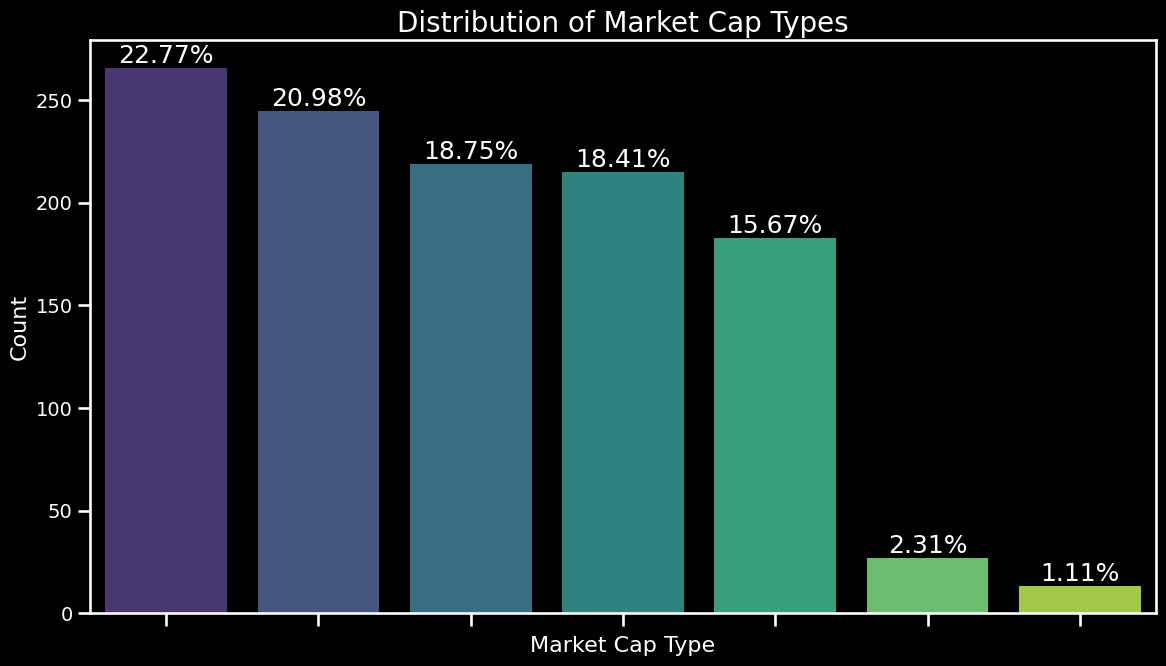

In [129]:
# Set dark mode for plotting
plt.style.use('dark_background')
sns.set_context('talk')  # Larger fonts and figures

# Create a bar chart with a modern and professional look
plt.figure(figsize=(12, 7))
# Assign 'marketCapType' to both x and hue, and explicitly disable the legend
barplot = sns.barplot(data=mc_groups, x='marketCapType', y='count', hue='marketCapType', palette='viridis', legend=False)

# After plotting, you can disable the legend that comes with using 'hue'
plt.legend([],[], frameon=False)

# Customize the plot with percentage labels
for index, row in mc_groups.iterrows():
    # Adjust the positioning based on your data for clarity
    barplot.text(index, row['count'], f'{row["percentage"]:.2f}%', color='white', ha="center", va="bottom")

plt.title('Distribution of Market Cap Types', fontsize=20, color='white')
plt.xlabel('Market Cap Type', fontsize=16, color='white')
plt.ylabel('Count', fontsize=16, color='white')
plt.xticks(rotation=45, fontsize=14, color='white')
plt.yticks(fontsize=14, color='white')

# Remove x-axis labels to avoid redundancy due to hue
barplot.set_xticklabels([])

# Show the plot
plt.tight_layout()
plt.show()

In [130]:
# print length of df
print(len(tv_df.index))
# print sample head
tv_df.sample(10)

1155


,Symbol,Description,Exchange,Market capitalization,Market capitalization - Currency,Price,Price - Currency,Pre-market Change,Pre-market Change - Currency,Pre-market Change %,...,Volatility 1 day,Volatility 1 week,Volatility 1 month,Volume Weighted Average Price 1 day,Price to earnings ratio,Sector,Beta 1 year,Beta 3 years,Beta 5 years,marketCapType
3,META,"Meta Platforms, Inc.",NASDAQ,1.233989e+12,USD,484.030,USD,2.0000,USD,0.411413,...,2.490255,2.259796,2.576637,486.912700,32.49330371,Technology Services,1.3388069,1.0570395,1.1544267,Titans
806,SGMO,"Sangamo Therapeutics, Inc.",NASDAQ,2.004021e+08,USD,1.130,USD,0.0700,USD,6.363636,...,15.238095,19.090499,19.512894,1.130000,-,Health Technology,2.0423908,0.38883758,1.0433345,Micro caps
1002,RCON,"Recon Technology, Ltd.",NASDAQ,2.380852e+07,USD,0.160,USD,0.0032,USD,1.928873,...,9.536082,8.380097,11.693076,0.161733,-,Distribution Services,1.5590972,1.8197706,2.1979163,Shrimp
1058,EZGO,EZGO Technologies Ltd.,NASDAQ,9.603561e+06,USD,0.094,USD,0.0034,USD,3.683640,...,9.560440,7.536459,8.453292,0.094900,-,Consumer Services,3.7407491,2.0076911,2.0076911,Shrimp
945,DMTK,"DermTech, Inc.",NASDAQ,4.348864e+07,USD,1.270,USD,0.0413,USD,3.176923,...,7.088710,6.573945,7.330453,1.279300,-,Health Technology,3.550314,3.6103346,2.5912127,Shrimp
1098,PBLA,"Panbela Therapeutics, Inc.",NASDAQ,5.437873e+06,USD,1.120,USD,0.0200,USD,1.801802,...,4.550459,6.451109,14.631576,1.116533,-,Health Technology,0.37707192,1.6977948,0.95494616,Shrimp
521,SANA,"Sana Biotechnology, Inc.",NASDAQ,1.776353e+09,USD,8.285,USD,0.0200,USD,0.247219,...,8.765432,8.791722,9.266336,8.395000,-,Health Technology,2.7505586,1.2481306,1.2481306,Small caps
252,ESTC,Elastic N.V.,NYSE,1.291410e+10,USD,129.620,USD,1.4400,USD,1.128881,...,3.068974,3.988530,3.846340,129.610000,-,Technology Services,1.4728556,0.76140666,0.95086443,Large caps
10,WMT,Walmart Inc.,NYSE,4.726485e+11,USD,175.560,USD,0.7000,USD,0.399065,...,1.334778,1.920612,1.349720,176.173333,30.60882907,Retail Trade,0.40131164,0.5553507,0.49047086,Titans
158,WIT,Wipro Limited,NYSE,3.342902e+10,USD,6.350,USD,0.0300,USD,0.474684,...,0.947493,1.350294,1.248229,6.354167,25.06908804,Technology Services,0.7011772,1.0860504,0.8713634,Large caps


| END OF IN PROGRESS WORK - NOTES BELOW |
|--|

,marketCapType,count
0,Large caps,266
1,Small caps,245
2,Shrimp,219
3,Midlers,215
4,Micro caps,183
5,Titans,27


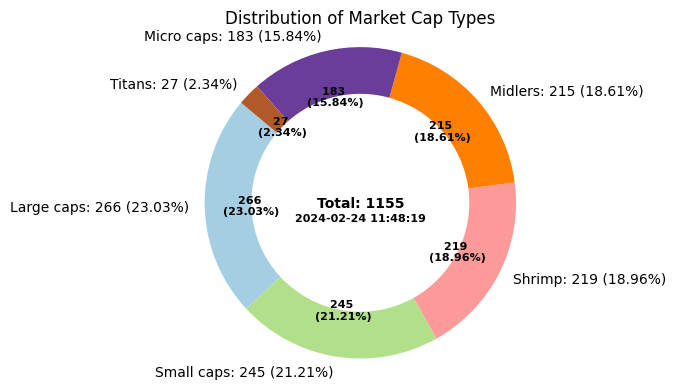

In [74]:
# from IPython.display import display, HTML
# import matplotlib.pyplot as plt
# from datetime import datetime
# import numpy as np

# # Assuming mc_groups is your DataFrame
# # Convert DataFrame to HTML and add custom styling for clearer, larger display
# html = mc_groups.to_html(classes='table table-striped')
# style = """
# <style>
#     .table {float: left; margin-right: 20px;}
#     .table th, .table td {font-size: 18px;}
# </style>
# """
# display(HTML(style + html))

# # Now, plot the donut chart, scaled down a bit, next to the DataFrame
# fig, ax = plt.subplots(figsize=(6, 4))  # Adjust figure size to scale down the chart

# # Pie chart code here, modified to fit the new figure size
# # Assume your labels, sizes, percentages, and colors are defined as before

# wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, startangle=140,
#                                   autopct='', pctdistance=0.85, wedgeprops=dict(width=0.3))

# # Customizing texts inside the donut as before
# for i, p in enumerate(wedges):
#     angle = (p.theta2 - p.theta1) / 2. + p.theta1
#     y = np.sin(np.deg2rad(angle))
#     x = np.cos(np.deg2rad(angle))
#     percentage = f'{sizes[i]} \n({percentages[i]:.2f}%)'
#     ax.text(x*0.7, y*0.7, percentage, ha='center', va='center', fontsize=8, color='black', weight='bold')

# ax.set_title('Distribution of Market Cap Types', fontsize=12)
# ax.text(0, 0, f'Total: {sizes.sum()}', ha='center', va='center', fontsize=10, color='black', weight='bold')
# ax.text(0, -0.1, datetime.now().strftime('%Y-%m-%d %H:%M:%S'), ha='center', va='center', fontsize=8, color='black', weight='bold')

# plt.axis('equal')
# plt.tight_layout()
# plt.show()


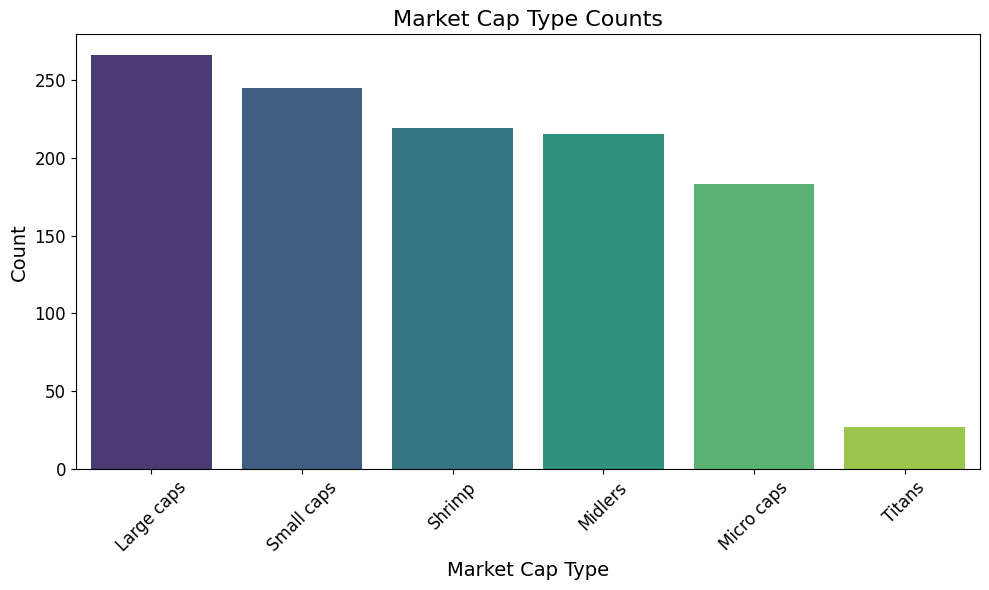

In [62]:
# plt.figure(figsize=(10, 6))
# # Assign 'marketCapType' to both x and hue, and disable the legend.
# sns.barplot(data=mc_groups, x='marketCapType', y='count', hue='marketCapType', palette='viridis', legend=False)
# plt.title('Market Cap Type Counts', fontsize=16)
# plt.xlabel('Market Cap Type', fontsize=14)
# plt.ylabel('Count', fontsize=14)
# plt.xticks(rotation=45, fontsize=12)
# plt.yticks(fontsize=12)
# plt.tight_layout()

# # Since we're now using 'hue', you'll need to remove the legend explicitly if it still appears.
# plt.legend([],[], frameon=False)

# plt.show()

In [ ]:
# feature selection
# features = ['Market capitalization', 'Volume 1 day', 'Volatility 1 week', 'Beta 1 year', 'Sector']
# features = features_raw_all
# target = 'Post-market Change %'

# # Preprocessing data: Drop rows with missing values in the selected columns
# tv_clean_df = trading_view_raw_df[features + [target]].dropna()

# # Check the unique values and their frequency for the target variable
# print(tv_clean_df['Post-market Change %'].value_counts())


# # Encoding categorical variables and scaling numerical variables
# categorical_features = ['Sector']
# numeric_features = list(set(features) - set(categorical_features))

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numeric_features),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
#     ])

# # Prepare the data for modeling
# X = tv_clean_df[features]
# y = tv_clean_df[target]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define and fit the model
# model = Pipeline(steps=[('preprocessor', preprocessor),
#                         ('regressor', LinearRegression())])

# model.fit(X_train, y_train)

# # Predict and evaluate the model
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f'MSE: {mse}')
# print(f'R^2: {r2}')

# # For detailed statistics, we need to fit the model using statsmodels
# # We'll prepare the data again because statsmodels requires it to be done differently
# X_train_transformed = model.named_steps['preprocessor'].transform(X_train)
# X_train_transformed = sm.add_constant(X_train_transformed)  # Adding a constant for the intercept

# # Fit the model using OLS
# ols_model = sm.OLS(y_train, X_train_transformed).fit()

# # Print the summary of the model to see detailed statistics
# print(ols_model.summary())
